En esta tarea de LDA y 치rboles de deicis칩n, trabajaremos con una base de datos obtenida de UCI Machine Learning Repository (debido a complicaciones de clasificaci칩n perfecta en base de datos de INEGI). La base de datos se llama 
Student Performance, la cual incluye una serie de informaci칩n sobre alumnos, desde calificaciones, edad, escuela de procedencia, entre otras. 

1. Importamos los datos al ambiente de trabajo. Despu칠s, nos deshcaemos de las variables categ칩ricas para dejar solamente variables num칠ricas para trabajar con la regresi칩n m치s adelante. Creamos una variable target que vale uno cuando la nota final (G3) es mayor a 10 y 0 en caso contrario. Es decir, b치sicamente estamos tratando de clasificar entre alumnos que van a aprobar la materia y alumnos que no.  

In [1]:
import pandas as pd #importar librer칤a
df=pd.read_csv("student.csv", sep=";") #leer archivo 
cols_no_num = df.select_dtypes(include=["object"]).columns # identificar columnas no num칠ricas
print("Columnas no num칠ricas:", cols_no_num.tolist())
df = pd.get_dummies(df, columns=cols_no_num, drop_first=True).astype(int)#convertir todas esas columnas a variables dummies
df["target"] = (df["G3"] > 10).astype(int) #creamos target
print(df.head()) #imprimimos primeras filas para revisar que todo est칠 en orden

Columnas no num칠ricas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0     1  ...               0              1           0         0   
1     1  ...               0              0           1         0   
2     2  ...               0              1           0         0   
3     1  ...               0             

Separamos los datos en entrenamiento y prueba, asegur치ndonos que la proporci칩n de clases se mantenga en train y test usando stratify. 

In [2]:
from sklearn.model_selection import train_test_split
x= df.drop(["G3", "target"], axis=1) # quitamos de las x las variables de salida
y = df["target"]  # definimos la variable de salida              
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
) #Separamos con un test 30%, train 70$% y mantenemos proporci칩n
print("Observaciones en DF") #Revusamos observaciones y proporciones
print(df.target.value_counts())
print("Proporci칩n en DF")
print(df.target.value_counts()/df.shape[0])
print("Observaciones en Y train")
print(y_train.value_counts())
print("Proporci칩n en Y train")
print(y_train.value_counts()/y_train.shape[0])
print("Observaciones en Y test")
print(y_test.value_counts())
print("Proporci칩n en Y test")
print(y_test.value_counts()/y_test.shape[0])

Observaciones en DF
target
1    452
0    197
Name: count, dtype: int64
Proporci칩n en DF
target
1    0.696456
0    0.303544
Name: count, dtype: float64
Observaciones en Y train
target
1    316
0    138
Name: count, dtype: int64
Proporci칩n en Y train
target
1    0.696035
0    0.303965
Name: count, dtype: float64
Observaciones en Y test
target
1    136
0     59
Name: count, dtype: int64
Proporci칩n en Y test
target
1    0.697436
0    0.302564
Name: count, dtype: float64


2. Corremos una regresi칩n log칤stica simple con la funci칩n GLM de statsmodels con todas las variables de entrada e imprimos el resumen del modelo en consola. 

In [3]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.GLM(y_train, x_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  454
Model:                            GLM   Df Residuals:                      412
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.576
Date:                Tue, 30 Sep 2025   Deviance:                       147.15
Time:                        19:20:29   Pearson chi2:                     435.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -26.1008      5.94

Las variables G2 y school_ms son las m치s importantes para la predicci칩n, lo podemos notar por su p-value muy bajo, por lo tanto dejaremos en x train y test solamente estas dos variables para poder continuar con los dem치s pasos de la tarea. 

In [4]:
vars_importantes = ["G2", "school_MS"]
x_train = x_train[vars_importantes]
x_test= x_test[vars_importantes]

3. Generamos un modelo usando la metodolog칤a de linear discriminant analysis. 

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaModel = LDA()
ldaModel.fit(x_train, y_train)
cl = ldaModel.predict(x_train)
print("Primeras 10 clases predichas:\n", cl[:10])

Primeras 10 clases predichas:
 [1 1 1 1 0 1 1 1 0 1]


Visualizamos la funci칩n discriminante con una gr치fica de G2 vs school_MS. Graficamos como scatter los puntos de train, y dibujamos la l칤nea donde se hace la partici칩n entre clases, para poder ver c칩mo se comporta. 

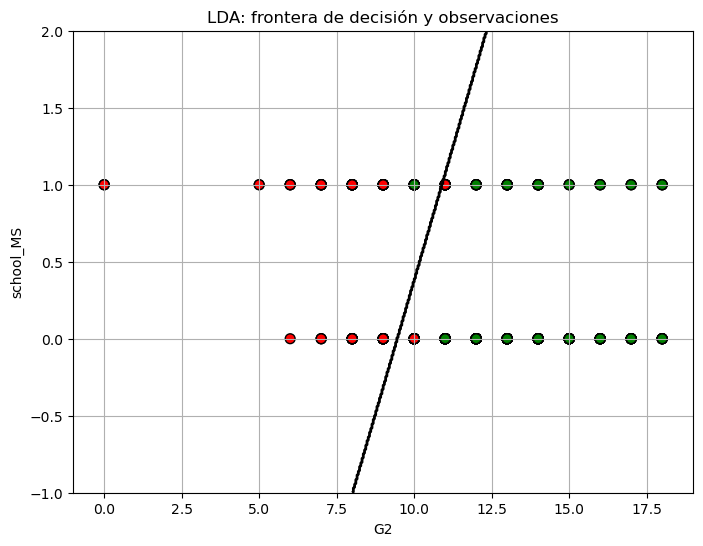

In [7]:
import numpy as np
import matplotlib.pyplot as plt
var1 = "G2"
var2 = "school_MS"
# Crear malla de puntos para graficar la funci칩n discriminante
x_min, x_max = x_train['G2'].min() - 1, x_train['G2'].max() + 1
y_min, y_max = x_train['school_MS'].min() - 1, x_train['school_MS'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Convertir malla a DataFrame con los mismos nombres de columnas que x_train
malla_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=x_train.columns)

# Predecir la clase para cada punto de la malla
Z = ldaModel.predict(malla_df)
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8,6))

# L칤nea exacta de separaci칩n de LDA
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Puntos de entrenamiento seg칰n clase predicha
X_plot = x_train
y_plot = y_train
# Puntos reales con colores rojo y verde seg칰n la clase
colors = ['red' if val==0 else 'green' for val in y_plot]  # Ajusta 0 y 1 seg칰n las clases
plt.scatter(X_plot[var1], X_plot[var2], c=colors, edgecolor="k", s=50)


plt.xlabel('G2')
plt.ylabel('school_MS')
plt.title('LDA: frontera de decisi칩n y observaciones')
plt.grid(True)
plt.show()


4. Generamos un modelo usando la metodolog칤a de 치rboles de decisi칩n. Podamos el 치rbol, habiendo seleccionado primero un valor 칩ptimo de 洧띺 mediante una metodolog칤a de LOOCV. 

In [8]:
from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC().fit(x_train, y_train) #Generamos el arbol
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
cv_scores = []
ccp = np.linspace(0.01, 0.5, 250) #escogemos 250 valores de alpha que est치n entre 0.01 y 0.5
import time
start_time = time.time()  # inicia el contador
for alpha in ccp: #para cada alpha en el rango
    pruned_tree = DTC(ccp_alpha=alpha) #generamos el arbol podado
    cv_scores.append(np.mean(cross_val_score(pruned_tree, x_train, y_train, cv=loo, scoring='accuracy'))) #probamos la acuracy

alpha = ccp[np.argmax(cv_scores)]
print("Best alpha (LOOCV):", alpha) #escogemos la mejor accuracy encontrada
end_time = time.time()  # termina el contador
elapsed_time = end_time - start_time
print("Tiempo transcurrido (segundos):", elapsed_time)

Best alpha (LOOCV): 0.01
Tiempo transcurrido (segundos): 195.9641728401184


Podamos con alpha encontrada y visualizamos el 치rbol

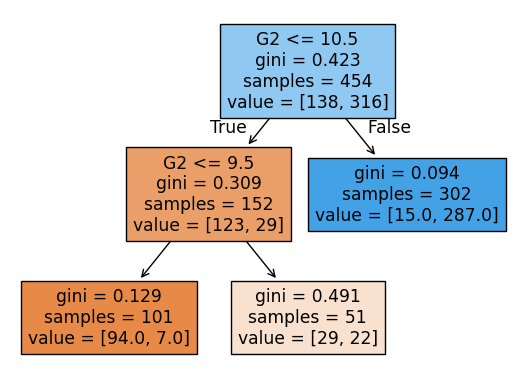

In [9]:
from sklearn.tree import plot_tree
pruned_tree = DTC(ccp_alpha=alpha).fit(x_train, y_train) #podamos el arbol con la mejor alpha
plot_tree(pruned_tree, filled=True, feature_names=x_train.columns); #graficamos el 치rbol 

Podemos ver que el 치rbol de decisi칩n generar치 una partici칩n en 10.5 y otra en 9.5. 
Visualizamos la partici칩n en una gr치fica de G2 vs school_MS

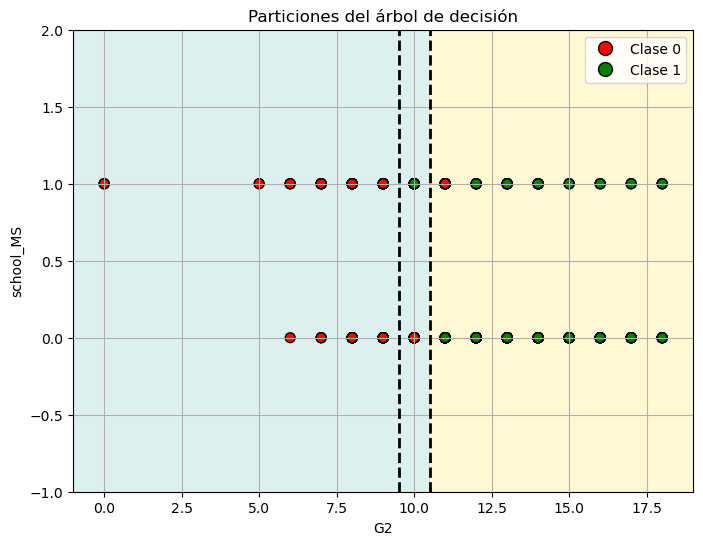

In [10]:

# Reentrenar 치rbol podado en estas 2 variables
tree_plot = DTC(ccp_alpha=alpha, random_state=42)
tree_plot.fit(X_plot, y_plot)

# Crear malla
x_min, x_max = X_plot[var1].min() - 1, X_plot[var1].max() + 1
y_min, y_max = X_plot[var2].min() - 1, X_plot[var2].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

malla_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[var1, var2])
Z = tree_plot.predict(malla_df).reshape(xx.shape)

plt.figure(figsize=(8,6))

# Regiones de decisi칩n
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)

# Puntos reales con colores rojo y verde seg칰n la clase
colors = ['red' if val==0 else 'green' for val in y_plot]  # Ajusta 0 y 1 seg칰n las clases
plt.scatter(X_plot[var1], X_plot[var2], c=colors, edgecolor="k", s=50)

# Leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clase 0', markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Clase 1', markerfacecolor='green', markersize=10, markeredgecolor='k')
]
plt.legend(handles=legend_elements)

# L칤neas de corte del 치rbol
plt.axvline(x=9.5, color="black", linestyle="--", linewidth=2)
plt.axvline(x=10.5, color="black", linestyle="--", linewidth=2)

plt.xlabel(var1)
plt.ylabel(var2)
plt.title("Particiones del 치rbol de decisi칩n")
plt.grid(True)
plt.show()


5. Calculamos, para ambos modelos, todas las m칠tricas revisadas en clase en los datos de prueba.

----- LDA -----
Accuracy: 0.897
Precision: 0.933
Sensitivity: 0.919
Specificity: 0.847
F1-score: 0.926


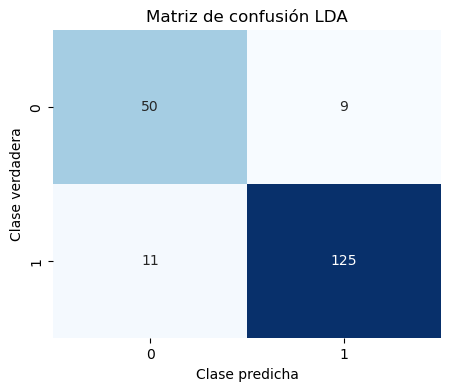

----- 츼rbol de Decisi칩n -----
Accuracy: 0.892
Precision: 0.983
Sensitivity: 0.860
Specificity: 0.966
F1-score: 0.918


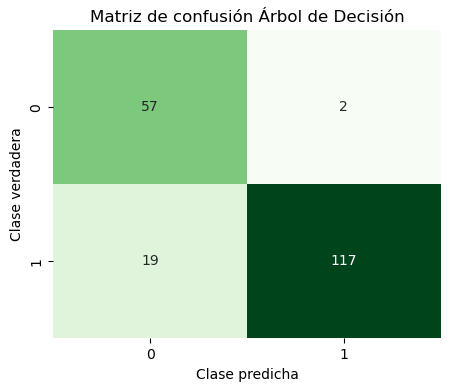

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def compute_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)  # Esto es Sensitivity
    f1 = f1_score(y_true, y_pred)
    
    # Specificity = TN / (TN + FP)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    spec = tn / (tn + fp)
    
    return acc, prec, rec, spec, f1

# ----- LDA -----
y_pred_lda = ldaModel.predict(x_test)
acc, prec, sens, spec, f1 = compute_metrics(y_test, y_pred_lda)
print("----- LDA -----")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Sensitivity: {sens:.3f}")
print(f"Specificity: {spec:.3f}")
print(f"F1-score: {f1:.3f}")

# Matriz de confusi칩n LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Clase predicha')
plt.ylabel('Clase verdadera')
plt.title('Matriz de confusi칩n LDA')
plt.show()

# ----- 츼rbol de Decisi칩n -----
y_pred_tree = pruned_tree.predict(x_test)
acc, prec, sens, spec, f1 = compute_metrics(y_test, y_pred_tree)
print("----- 츼rbol de Decisi칩n -----")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Sensitivity: {sens:.3f}")
print(f"Specificity: {spec:.3f}")
print(f"F1-score: {f1:.3f}")

# Matriz de confusi칩n 츼rbol de Decisi칩n
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Clase predicha')
plt.ylabel('Clase verdadera')
plt.title('Matriz de confusi칩n 츼rbol de Decisi칩n')
plt.show()
